# 4. Basic syntax and data types

Although learning the syntax and basic data types is probably the smallest problem when switching from MATLAB, it needs to be done. Besides, it's a good opportunity to introduce cool features, to give you some tips on pythonic code and to warn you of pitfalls.

## 4.1 Assignments 

Assigment in the simplest form works just the way it works in MATLAB. <br/>
The easiest way to think about assignments is: The variable on the left hand side now holds the value on the right hand side. We'll see in a few minutes why that's not a good mental model.

MATLAB:
```
a = 1;
b = [1,2,3];
c = 'string';
```

Python:
Try it out yourself and assign some values to variables.<br/>
(Hint: In Jupyter notebook you can run cells with `Ctrl+Enter` and run cells and jump to the next one with `Shift+Enter`).

In [16]:
#your code here


A note on variable names: In contrast to MATLAB, python has an official [style guide](https://peps.python.org/pep-0008/), that gives you conventions for how to name variables, functions and classes among other things. I'll refer to it again, but for now you should be aware of the part on variable names. 

Variables in python should
 * start with a lowercase letter
 * use underscores to separate words
 * be self-explanatory

Let's say we have a variable that counts the number of lines. Here's a few bad examples:

```python
n # not clear what it is
numOfLines # kinda okay, but camel case is not the python way
NumOfLines # capital letters in the beginning are for classes, not variables
Num_of_lines # I see this all the time in scripts, please don't do this
Num_ofLines # what the fuck are you doing?
```
This is a good way to name the variable:
```
num_of_lines
```

More important than sticking to the exact suggestions (and sometimes there are several options) is to be consistent. Decide for one style and stick to it.

### 4.1.1 Chained assignment:

Chained assignments are a way to assign the same value to multiple variables. It work like this:
```
var_1 = var_2 ... = var_n = assigned object/"value"
```

Try it out:

In [3]:
#your code here


Use this one with caution. We'll see why in a minute.

### 4.1.2 Multiple assigments. 
This is possible in MATLAB using the `deal()`-function

MATLAB:
```
[a, b] = deal(1, 1);
```
In Python you don't need brackets on the left hand side.
Also, it's a regular way to assign values:

```
var_1, var_2 = obj_1, obj_2
```

This way you can also switch the object that variables are assigned to:

```
var_1, var_2 = var_2, var_1
```

Try it out, assign two variables. Then switch their values.

In [1]:
#your code


### 4.1.3 Conditional assignments

A feature that many programming languages have is a so called **ternary operator**. Usually it's in the form `a ? b : c`. This expression evaluates to `b` if `a` is a <font color="green">true</font>, otherwise it evaluates to `c`. `a` is anything that can be considered a logical expression like e.g. `y < 3`.

In an assignment that could be something like this
```C
x = a ? b : c;
```

The order of operands is a bit confusing here, so let's try again in a less concise form:
```Python
if a:
    x = b
else:
    x = c
```
which is valid Python.

A [pseudocode](https://en.wikipedia.org/wiki/Pseudocode) version of the **ternary operator** might look like this:
```
x = b if a else c 
```

Like so often, this is pretty close to what we actually do in Python. Here we see why the **ternary operator** is also called an **inline-if**:
```Python
x = b if a else c
```
Let's check your understanding of the conditional assignment.

In [1]:
a = 100 < 10 # This expression evaluates to either True or False, so the value of a is either True of False

x = 'spam' if a else 'eggs' #spam and eggs are the Python version of foo and bar

What is the value of `x`? Think about it and then print it in the next cell.

In [7]:
#your code


Got it right? Nice! If not and you don't know why, don't hesitate to ask.
You can also write the logical condition directly into the expression like so:

In [2]:
x = 100
#consider any value above 150 as big, any value below as small.
size_of_x = 'big' if x >= 150 else 'small'
print(size_of_x)

small


## 4.2 Identity vs. Equality

This one is a **major pitfall** for users that are not used to the distinction between equality and identity. 
Let's first look at which behavior we would expect from MATLAB:

```
%assign array to variable a
a = [0,0,0];
%assign the value of a to b, i.e. make a copy
b = a;
%change value of b
b(1) = 99;
%we would expect that a is unchanged since we didn't change its value
disp(a);
ans =
    [0,0,0];
```

In Python this is different. Try it yourself.

In [1]:
a = [0, 0, 0] #this is a list, not an array - more on this later

Now assign the value of `a` to a new variable `b`. The syntax for this is just like in MATLAB.

In [10]:
#your code here


Change one of the elements of the list `b`. Keep in mind that indexing works with square brackets and 0-based. 
So what's `b(1)` in MATLAB becomes `b[0]` in Python.

In [11]:
#your code here


Now what would you expect `a` to look like? You didn't change its value, right? Have a look! <br/>
(Don't forget that `print()` is the equivalent to `disp()` in MATLAB)

In [26]:
#your code here


That was unexpected, wasn't it? It's necessary to get a good unterstanding of how assignments work. 
<br/><br/>
But first let's have a look at another example. We assign the integer value 1 to `c`:

In [4]:
c = 1

Assign `c` to `d`:

In [ ]:
#your code here


Change the value of `d` to another integer:

In [ ]:
#your code here


Now check the value of `c`:

In [28]:
#your code here


As you see, something here works differently than the way it works in MATLAB. <br/>

Maybe your mental model until now was something like:

```
a = [0, 1] means: now a has the value [0, 1] 
b = a      means: now b also has the value [0, 1] since this is the value that a has.
```

A better model is to not consider variables to have a value. But to consider them as index fingers that point at a certain location in the memory of your computer.
Something like this:

```
a = [0, 1] means: we create an object with the value [0, 1] in memory and we want the variable a to point 
                  to that location in memory.
b = a      means: we want b to also point to the same location that a points to.
```

Now we can change the "value" of `b` in two ways: 
<br/>
1.Change the object that `b` points at:
```
b[0] = 99 means: change the value of the first element of the object that is stored in the location 
                 that b is pointing at
```
Since `a` is pointing at the same object, the "value" of `a` also changes. Thus the behavior we saw makes sense.

The second way to change the "value" of `b` is to make `b` point at another location in memory.
Like this:
```
b = 99 means: b, bro, I'm sure your arm is tired. It's time to point at something else. 
              How about this sweet int value 99 somewhere else in memory?
```
This doesn't affect `a`, because it still points at the old location.

There is still a bit more to it. Integers don't change their value. You can only change the integer a variable is pointing to, but not the value of the integer.
In other words, when we create a variable that points at `1`, and then create another variable that also points at `1`, these will point at the same location because there is no reason to have more than one `1` in memory. This is at least true for integers in the range [-5, 255]. This range was chosen for efficiency reasons as these are the most often assigned values.

In [2]:
a = 1
b = 1
a is b

True

We'll cover *logical operators* in a second. For now it's enough to believe me that `is` is the logical operator that checks for identity. I.e. it checks if two objects point at the same location in memory.<br/><br/>
Things are different for other objects, that can be changed (the correct expression is **mutable objects**).
Since these can be changed, it makes sense to have multiple objects of the same value in memory.

In [8]:
a = [0, 1]
b = [0, 1]
a is b

False

Changing `a` has no effect on `b`, because they point at different objects that just happen to look alike.

In [9]:
a[0] = 99
print(b)

[0, 1]


**But**, as a reminder: 

In [11]:
a = b = [0, 1] # same works with a = [0, 1]; b = a;
a is b

True

In [12]:
a[0] = 99

Now, what do you expect? Think about it for a second, and when you know what you expect, check the value of b.

In [56]:
#your code here


All good? Don't hesitate to ask!
This might be a bit confusing. Just keep in mind that there's a distinction and you'll develop an intuition.<br/><br/>

## 4.3 Operators

### Logical operators

Except for `is` and the distinction between identity and equality, logical operators behave pretty much the way you'd except them to.<br/>
`<`, `>`, `<=`, `>=`, `==` are the same as in MATLAB. `~=` becomes `!=`.

In [13]:
a = 10
b = 99

Play around a bit to make sure that you understand how they behave - for now stick to numeric types.

In [ ]:
#your code here


**Logical and** and **logical or** are not the same as in MATLAB. While you can also use `&` and `|`, there's also the option to literally use `and` and `or`. Hello pseudocode.

In [16]:
#we create a third variable.
c = 99

Chain multiple logical conditions together. E.g. `a` is smaller than `b` and `b` equals `c`

In [82]:
#your code here


Using `not` you can negate the result of a logical condition.

In [17]:
not 1 == 2

True

Try it out in multiple chained conditions. E.g. `a` is not bigger than `b` and `b` is not unequal to `c`


In [18]:
#your code here


You can also directly chain logical conditions together when they make sense. I.e. if you want to know if a value is in between two other values, you don't have to write `x > 10 and x < 20`. Instead, use `10 < x < 20`.

Try it yourself:

In [5]:
#your code here



<br/>

### 4.3.2 Arithmetic operators

For the most part, they do the same as in MATLAB, at least for numeric values. Keep in mind that Python lists are not the same as MATLAB arrays. We'll cover than in the very near future.
<br/>Basic arithmetic operations are `+ `, `- `, `/ `, and  `* `.
<br/>The power function is not `^` but `**` or alternatively `pow(x, y)` where `x` is the base and `y` is the exponent.

Take a minute to make sure they do what you think they do:

In [4]:
# your code here, you can add cells below or above by leaving insertion mode with "esc" and then "b" or "a"


There is two more operators: 

`//`, that performs floor division, i.e. divide and round down to nearest integer.

In [19]:
print(5 // 2)

2


`%`, which is the modulo operator - i.e. it returns the remainder after division. That means `a % b` is the same as `a - b * (a // b)`.

In [21]:
print(5 % 2)
5 % 2 == 5 - 2 * (5 // 2)

1


True

Since in base Python there are no matrices, operators perform element-wise operations or behave differently (e.g. list concatenation). In Python 3.5 `@` was introduced for matrix multiplication. We'll talk about this when we cover `numpy arrays`.

## 4.4. Built-in functions

This one is a big difference between Python and MATLAB. In MATLAB there is a huge number of functions that you can use just by starting MATLAB. In Python, most functions are either in a package that you need to manually import or they are methods of classes. We'll get to know this in the part about object oriented programming.

There's only a few functions that are built-in and follow the syntax `function_name(argument1, argument2,..., argument3)`. 

Another big difference is that you can not call functions without parentheses even if they don't need arguments. More on this later. 

A list of built-in functions can be found [here](https://docs.python.org/3/library/functions.html), some that you might expect are `abs()`, `sum()`, `min()`, `max()`, `all()` and `any()`. Others like `mean()` and `std()` need to be imported.

**Exercise**

Get the sum, minimum and maximum of the following list. Use the IPython magic (`function??`) to find out how to use these functions. Hint: An iterable is anything you can loop over, like e.g. a list.

In [2]:
a = [8, 8.2, -10];
#your code here


## 4.5 Indexing

Indexing in Python starts at 0. Indexing with slices `[from_index:to_index]` doesn't include the to_index. This is one of the few things that you'll need a while to get used to. My experience is that you can switch back and forth between 1- and 0-based indexing on the fly if you got used to both once. 

Arguably 0-based indexing is more in line with what happens in your computer's memory and it can help avoid [off-by-one errors](https://en.wikipedia.org/wiki/Off-by-one_error). But as usual everyone is very dogmatic about it and convinced that they're right. Just treat it as an arbitraty choice that you get used to. If you want to learn Python, there's no way around it.

We can use some visualization to get the idea down. Remember that a  variable is like an index finger that points somewhere in memory? Now for a second imagine the memory to be 1-dimensional. Since the first element is where the whole object in memory starts, the 0 means: Access the element with an offset of 0. Now you can think about zero-based indexing like this:

```Python
a = np.linspace(1,10,10) # same as linspace in MATLAB
a  #shows me where the object starts in memory.
a[0] #shows me the position of the first element of a, i.e. the one where a starts
```
Since `a` already points at the memory adress of the first element, we don't need to "go" any further. 

For those of you who consider themselves "visual learners" (yeah, I know...). Consider the same vector of integers from 1 to 10:

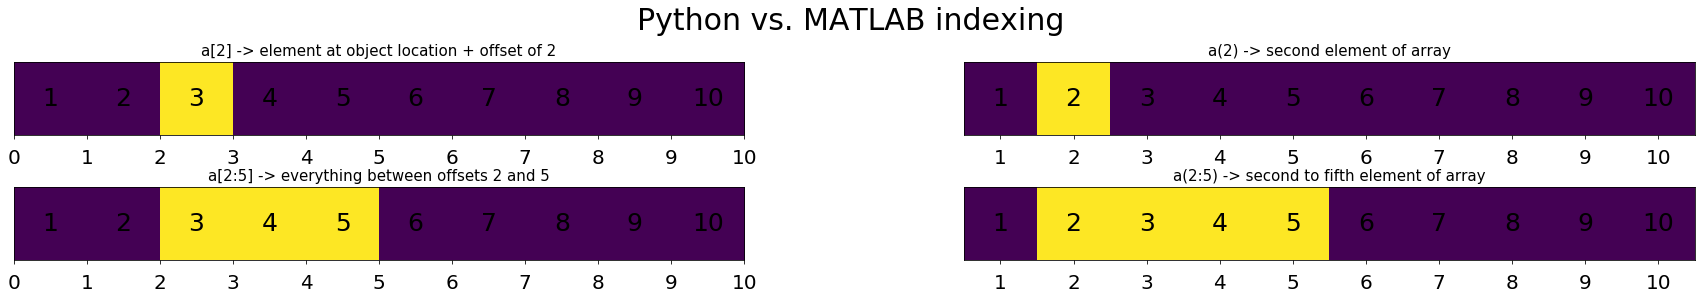

In [45]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import product

fig, axs = plt.subplots(
    ncols=2, 
    nrows=2, 
    figsize=(26, 4),
    constrained_layout=True
)
fig.suptitle('Python vs. MATLAB indexing', fontsize=30)

for x,y in product(range(2), range(2)):
    _ax = axs[x, y]
    _ax.set_xlim((-0.5, 9.5))
    _ax.imshow(np.zeros((1, 10)))
    _ax.set_yticks([])
    if not y:
        _ax.set_xticks(np.arange(-0.5,10.5,1))
        _ax.set_xticklabels([str(x) for x in range(11)], fontsize=20)
        if not x:
            _ax.imshow(np.array([0]*2 + [1] + [0]* 7)[np.newaxis, :])
            _ax.set_title("a[2] -> element at object location + offset of 2", fontsize=15)
        else:
            _ax.imshow(np.array([0]*2 + [1] * 3 + [0] * 5)[np.newaxis, ])
            _ax.set_title("a[2:5] -> everything between offsets 2 and 5", fontsize=15)
    else:
        _ax.set_xticks(np.arange(10))
        _ax.set_xticklabels([str(x + 1) for x in range(10)], fontsize=20)
        #_ax.xaxis.set_minor_locator(AutoMinorLocator(2))
        #_ax.xaxis.set_minor_formatter(FormatStrFormatter("%d"))
        #_ax.tick_params(axis='x', which='minor', labelsize=20)
        if not x:
            _ax.imshow(np.array([0]*1 + [1] + [0]* 8)[np.newaxis, :])
            _ax.set_title("a(2) -> second element of array", fontsize=15)
        else:
            _ax.imshow(np.array( [0]*1 + [1] * 4 + [0] * 5)[np.newaxis,:])
            _ax.set_title("a(2:5) -> second to fifth element of array", fontsize=15)
    
    _ax.tick_params(axis='x', which='both', direction='out', pad=10)
    for x in np.arange(10):
        _ax.text(
            x,
            0,
            str(x+1), 
            fontsize=25,
            horizontalalignment='center',
            verticalalignment='center' 
        )
plt.show()

### Indexing from the end

You can also index from the end using negative indices. This is 1-based, i.e. `a[-1]` would give us the last value of `a`.


**Exercise**

   1. Use indexing to retrieve the 2nd value of a
   2. The 4th and 5th
   3. The last two


In [3]:
a = list(range(10))
print(a)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [4]:
#your code here


## 4.6 Scalar Data Types

### Numeric data types

Numeric data types in Python are `int`, which are the natural numbers (i.e. 1,2,3...) and `float` which are real numbers (i.e. decimals). There'a also `complex` for complex numbers, but we won't cover them here. Usually any operation you do with `floats` and `ints` changes them to the appropriate type, so you don't need to worry about wether your variable is an `int` or a `float`. 

In [49]:
a = 1 
b = 2
print(type(a))
print(type(b))

<class 'int'>
<class 'int'>


If you divide a by b the result automatically becomes a `float`.

In [50]:
c = a / b
print(type(c))

<class 'float'>


If you do care, you can speficy natural numbers as `float` by adding a dot.

In [51]:
d = 1.
print(type(d))

<class 'float'>


### Booleans data

As always, there is two boolean values: <font color="green">True</font> and <font color="red">False</font>. The only difference to MATLAB is that they are capitalized. In logical conditions, other data types are transformed into boolean values. You can also do this manually by calling the `bool()`-function. 

In [5]:
type(False)

bool

**Exercise**<br/>
Check how the following variables behave as booleans:

In [53]:
one = 1
zero = 0
empty_list = []
neg_number = -1

In [54]:
#your code here 


Knowing how e.g. an empty list (or dictionary or set) translates to a boolean can come in very handy for logical conditions.

### 4.7 Control statements

Now we'll have a look at code snippets that control how your code is being executed. I won't cover everything and deliberately leave things like `while - else - statements` out for clarity and brevity. These are things you will learn when you need them. Nevertheless, the following should be enough to get you started using these statements.

The biggest difference to MATLAB here is that **indentation is meaningful**. But what does that mean?

In MATLAB you are encouraged to indent e.g. in loops and function definitions because this makes your code more readable. But it's not necessary. MATLAB knows where a block starts and ends by keywords like `end`. So the following is valid:

```
c = 0;
        x = 1;
    while c < 1000; x = x+1
a = x^3;
                b = a +2; c = c + a;
                                                        end

```

This is of course an exaggeration, but my old MATLAB code looked horribly untidy and maybe so does yours. Indentation is really helpful if you tend to code in a messy way because it forces you to write nicely structured code.

Python knows where a block starts and ends by indentation level. There is no `end` statement. The same (nonsense) code in Python without indentation wouldn't run. The only things I changed in the messy MATLAB code is the addition of a colon after the while condition and I deleted the `end`. This is also necessary for `if`, `else`,  `try` and so on. You will forget it all the time in the beginning.


In [ ]:
#the only changes here is the colon after the while-statement 
#and ** instead of ^
#while non-idiomatic, it's valid code except for the indentation 
c = 0
        x = 1
    while c < 1000: x = x+1
a = x ** 3
                b = a +2; c = c + a
                                                        

To make sure it runs you need to make sure that everything in the same level of control structures is also in the same level of indentation. If you run into problems with indentation levels even though your code looks visually fine, you've probably mixed tabs and spaces. This is something you should absolutely avoid. Most IDEs and Editors should have sensible defaults like expanding a tab into 4 spaces.

```Python
c = 0
x = 1
while c < 1000:
    x += 1 #don't forget about the cool features you always wanted
    a = x ** 3
    b = a + 2
    c += a

```

So what would you except to happen in the following cells? Think about it before each one and run it.

In [ ]:
#what do you except?
c = 0
x = 1
while c < 1000:
x += 1
a = x ** 3
b = a + 2
c += a

In [ ]:
# or here?
c = 0
x = 1
while c < 1000:
    x += 1
    a = x ** 3
    b = a + 2
        c += a

In [ ]:
# or here?
c = 0
x = 1
while c < 1000:
    x += 1
    a = x ** 3
    b = a + 2
c += a

You can press `i` twice or use the GUI (`kernel -> interrupt kernel`) to interrupt the kernel because this will run forever. Do you understand why? If not, just imagine adding an `end` anytime the indentation level decreases like so:

```Python
c = 0
x = 1
while c < 1000:
    x += 1
    a = x ** 3
    b = a + 2
    #indentation level decreases, add an end as comment
#end
c += a
```
So `c` never gets updated and this means the while condition will be true in a million years. Although of course at some point one of the variables will be too big for the memory and you will get an overflow error.

<br/><br/>

### while-loops

You know it from MATLAB, and we just had a look at the Python version. While-loops are indefinite iterations and you probably know how to use them:

**Exercise**

   1. Initiate a variable as the value 0. 
   2. Write a while-loop (condition follows).
   3. Increase the variable every iteration by 1.
   4. Square it and print the squared value.
   5. Use the while condition to stop the iterations once the squared value exceeds 1000.

In [56]:
#your code here


<br/>

### if-else-statements

`if...else...statements` in Python take the following form:

```Python
if condition1:
    do_stuff()
elif condition2: 
    do_other_stuff()
else:
    do_even_other_stuff()
```

The difference to MATLAB is again colons and indentation as well as `elif` instead of `elseif`. Also, there is no `end`. Ever.

**Exercise**

Repeat the while-loop you just wrote. But this time print 'spam' if the squared value is divisible by 3, print 'eggs' if it's divisible by 4, print 'spam and eggs' if it's divisible by both 3 and 4 and print the squared value itself otherwise.

(You can replace 'spam' and 'eggs' with 'tofu' and 'soy flour').

In [55]:
#your code here


*Hint*: If you never get the full breakfast, there's probably something wrong with the order of your conditions. Breakfast is important! Go back and go through the conditions line by line.

If you're done early and have headphones with you, here's some Python history: Python is named after the British comedy group Monty Python and the whole 'spam and eggs' thing goes back to [this sketch](https://www.youtube.com/watch?v=duFierM1yDg). So do spam mails.

### for-loops

`for-loops` loop over everything that is **iterable**. That's also true for MATLAB. Many people always ever use `for i = 1:10` or similar statements. But looping over arrays will iterate over columns and looping over cells will iterate over column subcells (which is consistent but really unintuitive). So while looping in MATLAB is more flexible than you might have thought - looping in Python has some additional features to offer.

Examples for **iterables** are lists, generator objects, dictionary values, numpy arrays, and so on. Most collections of values are **iterables**.

#### 4.7.3.1 Introducing the range()-function

The range()-function can be used to do the equivalent of the well-known `for i = 1:x`-construct. In contrast to `1:10`, it doesn't return an array or a list, but a range object. For now, it's enough to understand that you can use it in for-loops. If you want to turn it into a list, you can do that:

```Python
generator_range = range(10)
list_range      = list(generator_range)
```

The next big difference to MATLAB is that `range` includes 0 by default. You can specify a start value of your choice. The mathematical take is that the `range`-function produces a half-closed interval `[from, to)`. That means it includes the startpoint and excludes the endpoint.

Less abstract and maybe more helpful: If you are going "to the table", you're not actually **in** the table, are you?

Have a look in the next cell:

In [59]:
to_5 = list(range(5))
print(to_5)

[0, 1, 2, 3, 4]


<br/>

**Exercise**

Use the IPython magic `function?(?)` or the keyboard shortcut `function->Shift + Tab` to get more information about the range function. Don't worry if you don't understand everything immediately, that's expected. Then use the `range` and the `list` function to produce a list that goes from 3 to (including) 8.

In [95]:
#your code here


<br/>

**Exercise**

Now use the range function in a loop. The syntax is this:

```Python
for x in range([start_point], end_point):
    do_stuff()
```

Loop from 1 to (including) 100. Print those numbers to the screen that are divisible by 5.

In [60]:
#your code here


<br/>

There are a few pretty cool ways to make looping more efficient. We'll have a look at the two most common ones. If in the future you feel the need for additional variations of looping: They're probably possible in the `itertools` package.

#### enumerate()

If you want to loop over some iterable and still need an increasing index, you have to use a dummy variable in MATLAB.
E.g. assume that you want to loop over a vector and take the square root of all positive values. The resulting vector should have the same length:

```MATLAB
old_values = randn(1, 100);
new_values = zeros(1, 100);

counter = 1;

for ii = old_values
    if ii < 0
        new_values(counter) = sqrt(ii);
    else
        new_values(counter) = ii;
    end
    counter = counter + 1;
end
```

For this case we can use the `enumerate`-function that returns an index as well as the value from the iterable at every iteration.

```Python
for idx,val in enumerate(iterable):
    do_stuff_with_either_of_those()
```

<br/>

**Exercise** 

   1. Write a list of your three favorite movies/musicians/bands/foods/whatever
   2. Use enumerate to loop over them and print out a list of the form 
       ```
       1 Elliott Smith
       2 The Weakerthans
       3 Oso Oso
       
       ```
       
*Hint*: The `print()` function can take more than one argument. Also, your favorite movie is not 0 but 1.
(Also, this is awesome music. Check it out sometime.)

In [61]:
##your code here


<br/>

#### 4.7.3.3 zip()

This one is pretty easy to understand. Loop over multiple iterables at the same time:

In [7]:
for x,y in zip(['a', 'b', 'c'], [1, 2, 3]):
    print(x,y)

a 1
b 2
c 3


In [63]:
#also works with more iterables
for x,y,z in zip(['a','b','c'], [1,2,3], ['α','β','γ']):
    print(x,y,z)

a 1 α
b 2 β
c 3 γ


It can also be very handy outside of loops. This is too much for now, just remember that it can be used in different applications.

(Because of course you want to know: you get greek letters by e.g. writing `\alpha` and then hitting `Tab`. In a code cell of course.)


**Exercise**

Repeat the last exercise. Except use `zip` so you don't have to do the ugly `idx + 1`-thing every loop. Also add a list of other favorites of yours. E.g. if it was musicians until now, you might add your favorite meals like so:

```
1 Elliott Smith Steak
2 The Weakerthans Pizza
3 Oso Oso Kebap
```

In [118]:
#your code here


It even works when iterables don't have the same number of elements. What do you expect in the following code?

In [ ]:
for x,y in zip(range(10), ['Spam','Eggs','MoreSpam','Spam','Spam']):
    print(x,y)

<br/>

## 4.8 Function definitions


In MATLAB there are clear constraints on where you can define a function. Function handles can be defined anywhere including the command line. "Real" functions can only be defined in scripts. You can define functions used by other functions in the same scripts, but that's about it. In Python you can define functions anywhere and they are objects like everything else.

In [64]:
def obj_fun():
    return 'I am an object.'

isinstance(obj_fun, object)

True

Again, as you can see: There is no end statement and indentation is meaningful. This is a very general thing in Python and you better get used to it. It doesn't take long though.

### 4.8.1 Syntax of function definitions

Functions are defined using the keyword `def`. The basic structure can be seen in the following basic function that adds two arguments:

```Python
def add_values(arg1, arg2):
    output = arg1 + arg2;
    return output  
```

In MATLAB the same function would be:

```
function [output] = add_values(arg1, arg2)

    output = arg1 + arg2;
    
end
```

As you can see, the `return` statement is needed because otherwise the function doesn't return any output. It's the equivalent of the `[output]`-part in MATLAB. It's not an essential part of a function though. E.g. if you want to write a function that only prints text to the screen, you don't need a return statement. This is implicitly handled as `return None`. The `print()`-function itself is one of these functions:

In [25]:
a = print('I return None');
a is None

I return None


True

`return` also ends the execution of the function. E.g. if you want to leave it early if some condition is met, you can do that with a `return`- statement.

**Exercise**

Write a function that takes two arguments, takes the third power of the first argument and adds the second to it.

In [6]:
#your code here


<br/>

### 4.8.2 Named arguments and default values

Defining default values is not possible in MATLAB except through sophisticated constructs like `if nargin < 2` or something including `cellfun()`. In Python it is extremely easy. Generally, giving and defining arguments is more flexible. You can use named arguments or positional arguments when calling functions. If you use positional arguments, these have to be given in the same order as in the definition. For named arguments, this is not true. Order doesn't matter. You can give every argument in the function definition as named argument, independent of wether or not it has a default value.

A default value is defined like this: 

In [8]:
#for now, don't worry about the string concatenation. 
def print_person(user='Christian', language='MATLAB'):
    print('I am ' + user + ' and I use ' + language + '.')

#running it without specifying arguments uses the default values
print_person()

I am Christian and I use MATLAB.


In [9]:
#give new argument as positional arguments, for other argument, default is used. 
#If no keywords are given, the order in the definition is used, i.e. we overwrite the first argument "user"
print_person('Tobias')
print('(Until now.)')

I am Tobias and I use MATLAB.
(Until now.)


In [10]:
#overwrite both, in this case no keywords are needed, but order is important
print_person('Lukas', 'Python')

I am Lukas and I use Python.


In [11]:
#You can also use keywords. In this case, order doesn't matter. Generally this approach is a good idea because it is less prone to errors.
print_person(language='Python', user='Lukas')

I am Lukas and I use Python.


In [12]:
#If you want to overwrite only one argument and it's not the first one, keyword is needed 
print_person(language='Julia')

I am Christian and I use Julia.


<br/>

**Exercise**

Use the function above and try a few combinations. See if you understand the behavior. Discuss it with your colleagues or ask me if not. 

In [17]:
#your code here


<br/>

**Exercise**

Write your own function that takes two arguments. One of these should have a default value. Then play around with it and make sure you understand how giving arguments works. You can think of one yourself, but a simple idea would be a power function that takes the base and exponent, where the exponent defaults to 2, i.e. the square.
*Hint*: If you speficy multiple arguments and don't give defaults for all, the default arguments have to come last.

In [28]:
#your code here


<br/>

### 4.8.3 Multiple outputs

Just like in MATLAB, you can return multiple values but the way it works is slightly different. If you return multiple values in Python, you return a tuple. A tuple is something like a less flexible list and we'll get to know it in the next notebook. The syntax is:

```Python
def multiple_out(in1, in2):
    return (in1**2, in2**2)
```

The parentheses are optional since multiple values separated by commata are interpreted as tuple anyway:

In [13]:
a = 1, 2
print(a)
print(type(a))

(1, 2)
<class 'tuple'>


This means, you can just write

```Python
def multiple_out(in1, in2):
    return  in1**2, in2**2
```

and it's exactly equivalent. 

If a function returns multiple outputs, there are three options:

   1. Put them all into one variable, which will be a tuple.
   2. Provide one variable per output. Implicitely this means you're unpacking the tuple. We'll learn what that is in the next notebook.
   3. Put some isolated into variables and chunk the rest together as a tuple

You can ommit certain output by using `_` for those that you don't want. That's like using `[~, a] = some_function(b)` in MATLAB. 

Some code for clarification. Before running each cell, think about the output you'd expect and see if it matches your intuition.

In [14]:
def multiple_out(a, b, c):
    return a ** 2, b ** 2, c ** 2

In [15]:
c = multiple_out(3, 4, 5)
print(c)

(9, 16, 25)


In [16]:
d, _, _ = multiple_out(3, 4, 5);
print(d)

9


In [21]:
_, e, _ = multiple_out(3, 4, 5);
print(e)

16


In [22]:
_, *e = multiple_out(3, 4, 5);
print(e)

[16, 25]


### 4.8.4 Variable number of arguments

You can define functions that use a flexible number of nameless or named arguments using the keywords ***args** and ****kwargs** (although only the asterisks are important). They can be pretty handy and you will probably want to use them in the future. [Here](https://www.geeksforgeeks.org/args-kwargs-python/) is a nice introduction. For now, we'll just see a little example. You can pass arguments to a function that calls another function and passes these arguments on.

Think back to the `print_person` function it takes two arguments and has default values:

In [23]:
print_person()

I am Christian and I use MATLAB.


We can call this function from other functions:

In [24]:
def enhance_print_function():
    print_person()
    print('Because that\'s my favorite language.')

In [25]:
enhance_print_function()

I am Christian and I use MATLAB.
Because that's my favorite language.


If we wanted to pass functions to `print_person` while calling `enhance_print_function`, we don't need to define the arguments in the parent function. We can just use the `**kwargs`-argument. This will put all named arguments we might put it into a dictionary and then pass them on as named arguments to the next function like this:

In [73]:
def enhance_print_function(**kwargs):
    print_person(**kwargs)
    print('Because that\'s my favorite language.')

If we don't give any, everything stays the same:

In [74]:
enhance_print_function()

I am Christian and I use MATLAB.
Because that's my favorite language.


But if we do, the following happens:

In [76]:
enhance_print_function(user='Lukas', language='Python')

I am Lukas and I use Python.
Because that's my favorite language.


<br/> 

### 6.9.4 Lambda functions

Lambda or anonymous functions in Python are just *syntactic sugar*. That is, they work the same way that regular functions work but you define them differently. They were not originally meant to be a part of Python but were added later to prevent *dirty* workarounds to provide anonymous functions.

Recall what a function handle looks like in MATLAB:

```
fun = @(x) x^2;
fun(2)
ans =
    4
```

Lambda functions are pretty much that:

In [77]:
fun = lambda x: x ** 2
print(fun(2))

4


They can also take multiple arguments:

In [78]:
add = lambda x, y: x + y
print(add(2, 3))

5


Usually you don't **need** them, but it can be nice to define simple functions just in one line. Plus, they can make your code very concise if you use some of the functional programming techniques that Python stole from **Haskell** like `map()`, `filter()` or `reduce()`. We won't cover these in detail, also because Guido van Rossum [is not a big fan of these](https://python-history.blogspot.com/2009/04/origins-of-pythons-functional-features.html). Here is just one short example of what it could do: 

In [79]:
a = [1, 2, -1, 2, -33]
#use filter and a lambda function to select only positive values:
#the list( ) -part is necessary, because otherwise we get a filter-object as output. You don't have to understand that now
a_positive = list(filter(lambda x: x > 0, a))
print(a_positive)

[1, 2, 2]




# Conclusion


That's all you need to know for now about the basic syntax and scalar data types. Let's recall what you have learned, because it's actually **a lot**.

   1. Why you should learn Python (although you probably knew that before)
   2. How to set up an environment and install packages using conda and pip
   3. How to use a jupyter notebook and juypter lab
   4. How to assign variables and how assignments work in Python
   5. Operators including logical operators
   6. Numeric and boolean data types
   7. How to write while-loops, for-loops and if-else-conditions
   8. How to define functions and why that works everywhere
   
The next step is a mini introduction to object-oriented programming. This is needed to understand the more complex data types like lists, tuples, dictionaries and also numpy arrays and pandas data frames. 